Question 1:
Does possession time correlate with match outcomes in football leagues?


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline 

In [12]:
file ='../data_raw/PL_LaLiga_possession_2023_2024 (2).csv'
df = pd.read_csv(file)

In [13]:
df

,Team,Date,Venue,Opponent,Result,GF,GA,Poss
0,Arsenal,2023-08-12,Home,Nott'ham Forest,W,2,1,78.0
1,Arsenal,2023-08-21,Away,Crystal Palace,W,1,0,53.0
2,Arsenal,2023-08-26,Home,Fulham,D,2,2,71.0
3,Arsenal,2023-09-03,Home,Manchester Utd,W,3,1,55.0
4,Arsenal,2023-09-17,Away,Everton,W,1,0,74.0
...,...,...,...,...,...,...,...,...
1515,Villarreal,2024-05-05,Away,Celta Vigo,L,2,3,47.0
1516,Villarreal,2024-05-11,Home,Sevilla,W,3,2,59.0
1517,Villarreal,2024-05-14,Away,Girona,W,1,0,33.0
1518,Villarreal,2024-05-19,Home,Real Madrid,D,4,4,43.0


In [14]:
for i, v in enumerate(df.columns):
    print(i, v)

0 Team
1 Date
2 Venue
3 Opponent
4 Result
5 GF
6 GA
7 Poss


In [15]:
df.dtypes

Team         object
Date         object
Venue        object
Opponent     object
Result       object
GF            int64
GA            int64
Poss        float64
dtype: object

In [16]:
df.isnull().sum()


Team        0
Date        0
Venue       0
Opponent    0
Result      0
GF          0
GA          0
Poss        0
dtype: int64

"The dataset contains no missing values."

In [17]:
df.duplicated().sum()


np.int64(0)

"No duplicate records were found."

In [18]:
df.Result

0       W
1       W
2       D
3       W
4       W
       ..
1515    L
1516    W
1517    W
1518    D
1519    D
Name: Result, Length: 1520, dtype: object

In [19]:
Result_map = {
    'W': 3,
    'D': 1,
    'L': 0
}

df['Result_points']  = df['Result'].map(Result_map)
df

,Team,Date,Venue,Opponent,Result,GF,GA,Poss,Result_points
0,Arsenal,2023-08-12,Home,Nott'ham Forest,W,2,1,78.0,3
1,Arsenal,2023-08-21,Away,Crystal Palace,W,1,0,53.0,3
2,Arsenal,2023-08-26,Home,Fulham,D,2,2,71.0,1
3,Arsenal,2023-09-03,Home,Manchester Utd,W,3,1,55.0,3
4,Arsenal,2023-09-17,Away,Everton,W,1,0,74.0,3
...,...,...,...,...,...,...,...,...,...
1515,Villarreal,2024-05-05,Away,Celta Vigo,L,2,3,47.0,0
1516,Villarreal,2024-05-11,Home,Sevilla,W,3,2,59.0,3
1517,Villarreal,2024-05-14,Away,Girona,W,1,0,33.0,3
1518,Villarreal,2024-05-19,Home,Real Madrid,D,4,4,43.0,1


In [20]:
df[['Result', 'Result_points']].head()


,Result,Result_points
0,W,3
1,W,3
2,D,1
3,W,3
4,W,3


Data Preprocessing

The dataset was already clean with no missing values, no duplicated raws

Match results were encoded into numerical values (Win=3, Draw=1, Loss=0) to enable quantitative analysis

In [21]:
df = df.copy()
df['Result_Label'] = df['Result_points'].map({
    3: 'Win',
    1: 'Draw',
    0: 'Loss'
})


In [22]:
df

,Team,Date,Venue,Opponent,Result,GF,GA,Poss,Result_points,Result_Label
0,Arsenal,2023-08-12,Home,Nott'ham Forest,W,2,1,78.0,3,Win
1,Arsenal,2023-08-21,Away,Crystal Palace,W,1,0,53.0,3,Win
2,Arsenal,2023-08-26,Home,Fulham,D,2,2,71.0,1,Draw
3,Arsenal,2023-09-03,Home,Manchester Utd,W,3,1,55.0,3,Win
4,Arsenal,2023-09-17,Away,Everton,W,1,0,74.0,3,Win
...,...,...,...,...,...,...,...,...,...,...
1515,Villarreal,2024-05-05,Away,Celta Vigo,L,2,3,47.0,0,Loss
1516,Villarreal,2024-05-11,Home,Sevilla,W,3,2,59.0,3,Win
1517,Villarreal,2024-05-14,Away,Girona,W,1,0,33.0,3,Win
1518,Villarreal,2024-05-19,Home,Real Madrid,D,4,4,43.0,1,Draw


In [23]:
df["Poss"].describe()


count    1520.000000
mean       50.000658
std        12.509509
min        18.000000
25%        41.000000
50%        50.000000
75%        59.000000
max        82.000000
Name: Poss, dtype: float64

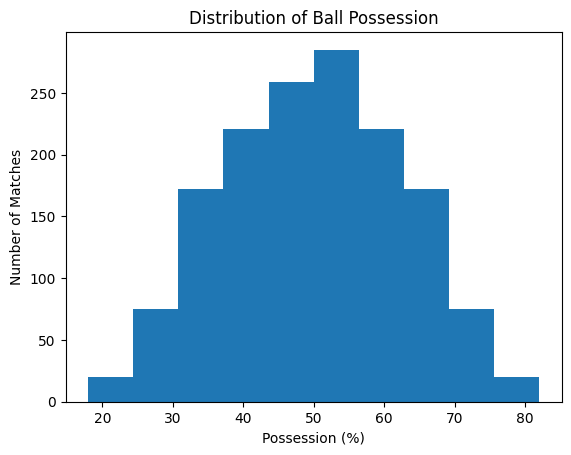

In [24]:
plt.hist(df['Poss'], bins=10)

plt.xlabel('Possession (%)')
plt.ylabel('Number of Matches')
plt.title('Distribution of Ball Possession')

plt.show()


The histogram shows that most matches have possession values centered around 45%–55%,
indicating that possession is usually balanced between teams.


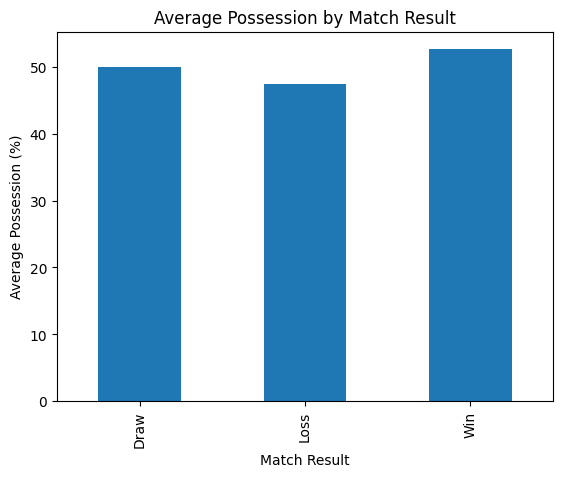

In [25]:
avg_poss = df.groupby('Result_Label')['Poss'].mean()
avg_poss.plot(kind='bar')
plt.title('Average Possession by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Average Possession (%)')
plt.show()




Figure: Average possession percentage by match result (Win, Draw, Loss).
This bar chart compares the mean possession for each match outcome. Winning teams tend to have slightly higher average possession than drawing or losing teams, suggesting a potential positive relationship between possession and match success.




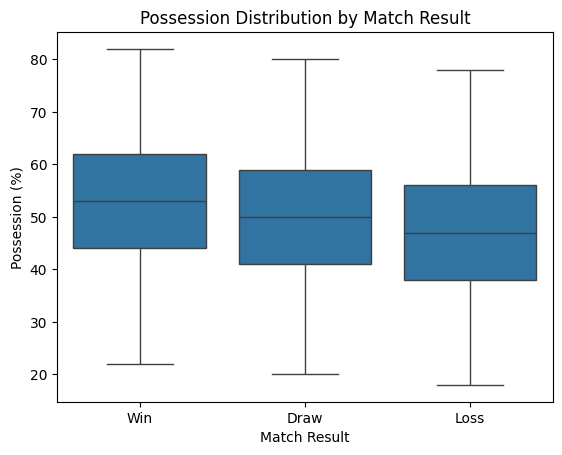

In [26]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df,x='Result_Label', y='Poss',color=base_color)
plt.title('Possession Distribution by Match Result')
plt.xlabel('Match Result')
plt.ylabel('Possession (%)')
plt.show()

The boxplot illustrates that winning matches generally have higher possession values, while losses tend to have lower possession.

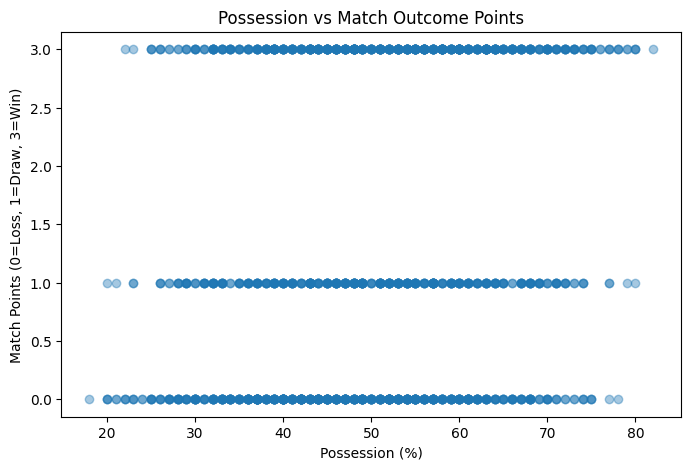

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(df['Poss'], df['Result_points'], alpha=0.4)

plt.xlabel('Possession (%)')
plt.ylabel('Match Points (0=Loss, 1=Draw, 3=Win)')
plt.title('Possession vs Match Outcome Points')

plt.show()


Figure: Scatter plot showing the relationship between ball possession percentage and match outcome points.
Each point represents a single match, where the outcome is encoded as 0 for a loss, 1 for a draw, and 3 for a win. Since match outcome points take only three discrete values, the points appear in horizontal bands. The plot suggests a weak positive association, where higher possession is slightly more common in matches with higher points.

In [33]:
df[['Poss','Result_points']].corr()

,Poss,Result_points
Poss,1.000000,0.179683
Result_points,0.179683,1.000000


Pearson correlation between possession percentage and match outcome points
correlation coefficient is approximately 0.18, indicating a weak positive linear relationship. This suggests that while higher possession is associated with a slightly higher likelihood of gaining points, possession alone is not a strong predictor of match results.